In [0]:
import os
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
columns =["userId",  "ProductId", "Ratings", "Timestamp"]

In [0]:
electronic_df = pd.read_csv("/content/gdrive/My Drive/Recomendationsystem/ratings_Electronics.csv",names=columns)  

In [10]:
electronic_df

,userId,ProductId,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [0]:
electronic_df.drop("Timestamp",axis=1,inplace = True)

In [0]:
electronic_df = electronic_df.iloc[0:6500000,:]

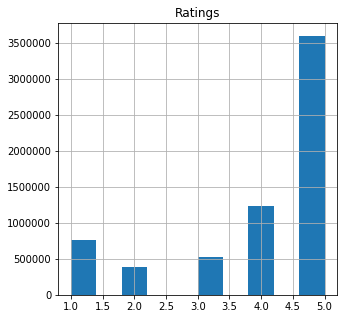

In [13]:
electronic_df.hist(figsize =(5,5),bins=10)
plt.draw()

In [ ]:
#from the histogram it looks like users have given 5 rating to almost 3500000 movies.

In [14]:
rating_range =electronic_df['Ratings'].unique()
sorted(rating_range)

[1.0, 2.0, 3.0, 4.0, 5.0]

In [15]:
electronic_df

,userId,ProductId,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
6499995,A3K7QU8ICJ9HQ8,B0096TK65A,5.0
6499996,A2G0SQQEXYVF4E,B0096TK65A,5.0
6499997,A21V6HAYFT4JKM,B0096TK65A,5.0
6499998,AWOKTANG76OL0,B0096TK65A,5.0


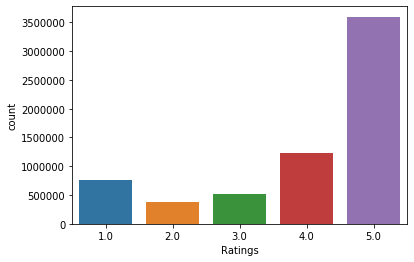

In [16]:
sns.countplot(electronic_df['Ratings'])

In [0]:
filtered_edf=electronic_df.groupby("userId").filter(lambda x:len(x)>50)

In [18]:
filtered_edf

,userId,ProductId,Ratings
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0
...,...,...,...
6496853,AVPNQUVZWMDSX,B0096T97OG,5.0
6497088,A1E1LEVQ9VQNK,B0096T97OG,5.0
6497805,A2LB4FLRZG6CUV,B0096T97OG,5.0
6498062,A2FSOHSM9X13JT,B0096T97OG,4.0


In [19]:
filtered_edf.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78143 entries, 118 to 6499752
Data columns (total 3 columns):
userId       78143 non-null object
ProductId    78143 non-null object
Ratings      78143 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [20]:
filtered_edf.dtypes

userId        object
ProductId     object
Ratings      float64
dtype: object

In [21]:
filtered_edf['Ratings'].value_counts()

5.0    44051
4.0    19631
3.0     7486
2.0     3514
1.0     3461
Name: Ratings, dtype: int64

In [22]:
filtered_edf.groupby('ProductId')['Ratings'].mean().head()

ProductId
0594481813    3.0
0970407998    2.5
0972683275    5.0
1400501466    3.0
1400501520    5.0
Name: Ratings, dtype: float64

In [23]:
filtered_edf.groupby('ProductId')['Ratings'].count().sort_values(ascending=False).head()

ProductId
B0088CJT4U    138
B003ES5ZUU    137
B000N99BBC    111
B007WTAJTO    110
B002R5AM7C    105
Name: Ratings, dtype: int64

In [24]:
filtered_edf.groupby('ProductId')['Ratings'].mean().sort_values(ascending = False).head(10)

ProductId
B0096TK65A    5.0
B00008H2NG    5.0
B000NDTBCW    5.0
B000NDRXS6    5.0
B003CHMCXG    5.0
B00008I9JL    5.0
B003CIBCX6    5.0
B0002GWG40    5.0
B000NDGOIG    5.0
B003CH5346    5.0
Name: Ratings, dtype: float64

In [0]:
ratings_mean_count = pd.DataFrame(electronic_df.groupby('ProductId')['Ratings'].mean().sort_values(ascending = False)) 

In [ ]:
#Recommending Movies based on most number of ratings


In [26]:
ratings_mean_count

,Ratings
ProductId,
B003FUU1LK,5.0
B003ZSAO64,5.0
B003ZTDXKM,5.0
B003ZTB6B0,5.0
B003ZTB3K4,5.0
...,...
B0002ZQG7E,1.0
B008TL6J5C,1.0
B001MQ8CZQ,1.0


In [0]:
ratings_mean_count['rating_counts'] = pd.DataFrame(electronic_df.groupby('ProductId')['Ratings'].count())

In [28]:
ratings_mean_count

,Ratings,rating_counts
ProductId,,
B003FUU1LK,5.0,2
B003ZSAO64,5.0,1
B003ZTDXKM,5.0,2
B003ZTB6B0,5.0,1
B003ZTB3K4,5.0,4
...,...,...
B0002ZQG7E,1.0,1
B008TL6J5C,1.0,1
B001MQ8CZQ,1.0,1


In [0]:
mean_rating_dataset = np.mean(ratings_mean_count.Ratings.values)

In [0]:
min_votes = 5

In [0]:
def weighted_rating(rating_mean_count, min_votes, mean_rating_dataset):
    weighted_rating = list()
    V = rating_mean_count.rating_counts.values
    R = rating_mean_count.Ratings.values
    for v, r in zip(V, R):
        if v < 5:
            weighted_rating.append(0)
        else:
            weighted_rating.append((v/(v+min_votes))*r + (min_votes/(v+min_votes))*mean_rating_dataset)
    return(weighted_rating)

In [0]:
ratings_mean_count['weighted_rating'] = weighted_rating(ratings_mean_count, min_votes, mean_rating_dataset)

In [99]:
ratings_mean_count.weighted_rating.sort_values(ascending = False).head(10)

ProductId
B008VGCT9K    4.916650
B000053HC5    4.914695
B008I6RVZU    4.901971
B0043ZLFXE    4.899083
B0033PRWSW    4.888808
B008I64AQ8    4.888257
B007SZ0E1K    4.884169
B004I763AW    4.883275
B002E6R7NG    4.882372
B0000DYV9H    4.881640
Name: weighted_rating, dtype: float64

In [ ]:
#Based on the popularity based ,we got the best 10 products to reccomend.

In [34]:
pip install scikit-surprise

In [0]:
from surprise import KNNWithMeans
from surprise import Dataset,Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD

In [0]:
reader = Reader()

In [0]:
data = Dataset.load_from_df(filtered_edf[["userId","ProductId","Ratings"]],reader)
trainset, testset = train_test_split(data, test_size=.3)

In [38]:
trainset.ur

defaultdict(list,
            {0: [(0, 4.0),
              (669, 5.0),
              (1294, 4.0),
              (1720, 5.0),
              (2407, 3.0),
              (2429, 3.0),
              (3430, 5.0),
              (3762, 5.0),
              (4799, 5.0),
              (3151, 4.0),
              (5823, 5.0),
              (6012, 4.0),
              (5220, 5.0),
              (7804, 4.0),
              (9708, 4.0),
              (10915, 2.0),
              (11021, 4.0),
              (11830, 5.0),
              (1653, 5.0),
              (14591, 4.0),
              (11064, 4.0),
              (1217, 5.0),
              (8604, 5.0),
              (17454, 4.0),
              (1381, 3.0),
              (18147, 3.0),
              (1725, 5.0),
              (5699, 5.0),
              (15336, 5.0),
              (18598, 2.0),
              (18601, 3.0),
              (7540, 4.0),
              (6017, 4.0),
              (9687, 4.0),
              (20756, 4.0),
              (10062, 4.0),

In [39]:
algo = SVD()
algo.fit(trainset)

In [ ]:
#we will test the rmse for SVD and item item based collaborative filtering.

In [0]:
test_pred = algo.test(testset)

In [41]:
test_pred

[Prediction(uid='AAXAKFQEAQPWC', iid='B000VS4HDM', r_ui=5.0, est=4.057083681729747, details={'was_impossible': False}),
 Prediction(uid='A54S9CIUV5VNB', iid='B0009HGVZW', r_ui=5.0, est=4.437479887190611, details={'was_impossible': False}),
 Prediction(uid='A3CJOB7CHOSZUG', iid='B0000VYJRY', r_ui=5.0, est=4.727409916903022, details={'was_impossible': False}),
 Prediction(uid='A2UTZ4O5E2W4DK', iid='B000IQYPGQ', r_ui=5.0, est=4.539905172956032, details={'was_impossible': False}),
 Prediction(uid='A680RUE1FDO8B', iid='B00009R8I4', r_ui=4.0, est=3.9120476615339954, details={'was_impossible': False}),
 Prediction(uid='A2FHTXLKY1XJDB', iid='B002ZW3WQK', r_ui=5.0, est=3.9936164396179823, details={'was_impossible': False}),
 Prediction(uid='AYMD77ITD15PT', iid='B00008NG70', r_ui=3.0, est=4.428795027656271, details={'was_impossible': False}),
 Prediction(uid='A3B20R4ZAH0Y2Y', iid='B00829TIEK', r_ui=5.0, est=4.3431950592759385, details={'was_impossible': False}),
 Prediction(uid='A3F3B1JPACN215',

In [0]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
#algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
#algo.fit(trainset)

In [0]:
# run the trained model against the testset
#test_pred = algo.test(testset)

In [43]:
test_pred

[Prediction(uid='AAXAKFQEAQPWC', iid='B000VS4HDM', r_ui=5.0, est=4.057083681729747, details={'was_impossible': False}),
 Prediction(uid='A54S9CIUV5VNB', iid='B0009HGVZW', r_ui=5.0, est=4.437479887190611, details={'was_impossible': False}),
 Prediction(uid='A3CJOB7CHOSZUG', iid='B0000VYJRY', r_ui=5.0, est=4.727409916903022, details={'was_impossible': False}),
 Prediction(uid='A2UTZ4O5E2W4DK', iid='B000IQYPGQ', r_ui=5.0, est=4.539905172956032, details={'was_impossible': False}),
 Prediction(uid='A680RUE1FDO8B', iid='B00009R8I4', r_ui=4.0, est=3.9120476615339954, details={'was_impossible': False}),
 Prediction(uid='A2FHTXLKY1XJDB', iid='B002ZW3WQK', r_ui=5.0, est=3.9936164396179823, details={'was_impossible': False}),
 Prediction(uid='AYMD77ITD15PT', iid='B00008NG70', r_ui=3.0, est=4.428795027656271, details={'was_impossible': False}),
 Prediction(uid='A3B20R4ZAH0Y2Y', iid='B00829TIEK', r_ui=5.0, est=4.3431950592759385, details={'was_impossible': False}),
 Prediction(uid='A3F3B1JPACN215',

In [44]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.0111


1.011137737996932

In [0]:
from collections import defaultdict

In [0]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [0]:
top_n = get_top_n(test_pred, n=5)

In [48]:
top_n

defaultdict(list,
            {'A100UD67AHFODS': [('B0082E9K7U', 5),
              ('B0053T4PHC', 4.611223222814648),
              ('B00133BAKM', 4.520875635899114),
              ('B004V3KCJG', 4.48737321921283),
              ('B003O8682Y', 4.45096037715949)],
             'A100WO06OQR8BQ': [('B003ES5ZUU', 4.644109742667379),
              ('B001342KM8', 4.487678089233851),
              ('B00006HSYC', 4.222171672845377),
              ('B004CLYE8C', 4.208240568969911),
              ('B00002EQCW', 4.144024551342199)],
             'A105TOJ6LTVMBG': [('B002RM08RE', 4.30978787454474),
              ('B00029U1DK', 4.20240244609029),
              ('B004W2JKWG', 4.128991026284819),
              ('B002MAPRYU', 3.949270741988468),
              ('B001MX5YWI', 3.946213654288777)],
             'A10NMELR4KX0J6': [('B004LSNF04', 4.676185753267778),
              ('B002HWRJBM', 4.335351831060683),
              ('B005T3GPXE', 4.303845611336739),
              ('B008R6OPJQ', 4.27388336784205

In [ ]:
#from the two algorithm used,SVD and item-item collaborative filtering,RMSE value for SVD is coming low.so i have used SVD model to reccomend top 5 movies to the users.